# UNB - PPGI
# Processamento de Imagem
## Trabalho 08

Henrique Brandão

___

Escolha duas imagens monocromáticas entre as que você já utilizou:

- Segmente as imagens em pelo menos 5 regiões homogêneas sob algum critério que você defina;
- Use todas as ferramentas de processamento de imagens que você quiser.

 
Entrega é um documento em PDF em formato de relatório. Código só em sessão de anexo/apêndice. Não precisa enrolar nem colocar background, mas precisa discutir o que você está fazendo e discutir os resultados. 

In [1]:
import cv2
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns

from math import sqrt
from random import choice

from PIL import Image
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
f1, f2 = 'img01.jpg', 'img02.jpg'

x1 = cv2.cvtColor(cv2.imread(f1), cv2.COLOR_BGR2RGB)
x2 = cv2.cvtColor(cv2.imread(f2), cv2.COLOR_BGR2RGB)

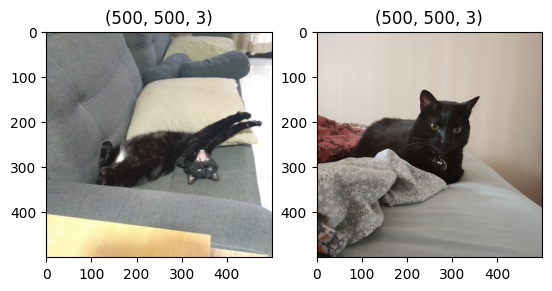

In [3]:
plt.subplot(1,2,1)
plt.title(x1.shape)
plt.imshow(x1)

plt.subplot(1,2,2)
plt.title(x2.shape)
plt.imshow(x2)

plt.show()

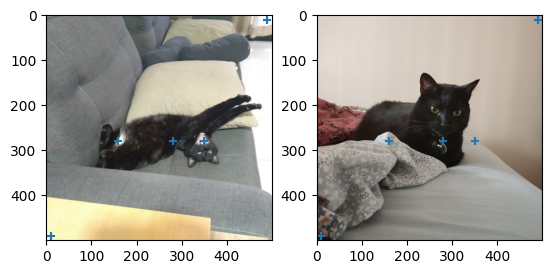

In [79]:
_x = (10, 160, 280, 350, 490)
_y = (490, 280, 280, 280, 10)

plt.subplot(1,2,1)
plt.imshow(x1)
plt.scatter(x=_x, y=_y, marker='+')

plt.subplot(1,2,2)
plt.imshow(x2)
plt.scatter(x=_x, y=_y, marker='+')

plt.show()

In [75]:
# ini = [
#     [x1[p[0],p[1],:] for p in list(zip(_x, _y))]
# ]
ini = [
    [252, 252, 252],
    [220, 214, 188],
    [28, 26, 27],
    [128, 131, 124],
    [255, 250, 195],
]

In [73]:
def segmentar(img, init=None, n=5):
    shape_old = img.shape
    pixels = img.reshape((-1, 3))
    if init:
        kmeans = KMeans(n_clusters=n, random_state=42, init=init)
    else:
        kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(pixels)
    labels = kmeans.labels_
    centros = kmeans.cluster_centers_
    segmentada = centros[labels].reshape(shape_old)
    return segmentada

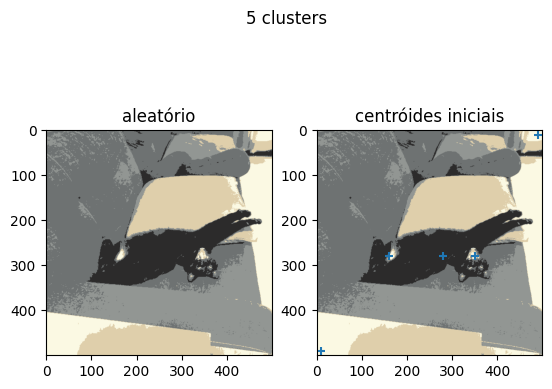

In [77]:
y1a = segmentar(x1)
y1a = y1a.astype(np.uint8)

y1b = segmentar(x1, init=ini)
y1b = y1b.astype(np.uint8)

plt.suptitle('5 clusters')

plt.subplot(1,2,1)
plt.title('aleatório')
plt.imshow(y1a)

plt.subplot(1,2,2)
plt.title('centróides iniciais')
plt.imshow(y1b)
plt.scatter(x=_x, y=_y, marker='+')

plt.show()

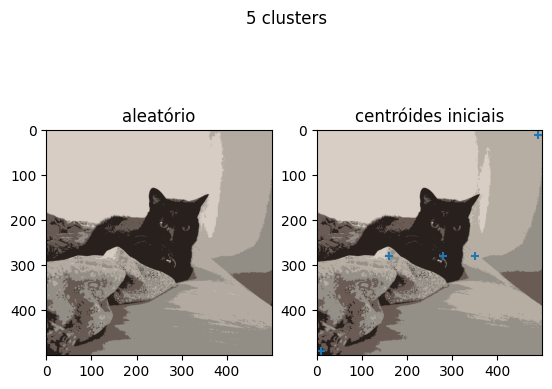

In [78]:
y2a = segmentar(x2)
y2a = y2a.astype(np.uint8)

y2b = segmentar(x2, init=ini)
y2b = y2b.astype(np.uint8)

plt.suptitle('5 clusters')

plt.subplot(1,2,1)
plt.title('aleatório')
plt.imshow(y2a)

plt.subplot(1,2,2)
plt.title('centróides iniciais')
plt.imshow(y2b)
plt.scatter(x=_x, y=_y, marker='+')

plt.show()